In [3]:
import pandas as pd

In [4]:
import numpy as np

In [5]:
import pandas_datareader.data as web

In [6]:
import datetime

In [7]:
start = datetime.datetime(2016, 1, 1)

In [8]:
end = datetime.datetime(2021, 2, 10 )

In [9]:
code_name = '^KS11'

In [10]:
code = web.DataReader(code_name, "yahoo", start, end)

In [11]:
code

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-01-04,1954.520020,1918.760010,1954.469971,1918.760010,359000.0,1918.760010
2016-01-05,1937.569946,1911.930054,1911.930054,1930.530029,446500.0,1930.530029
2016-01-06,1934.250000,1911.609985,1934.250000,1925.430054,594600.0,1925.430054
2016-01-07,1926.410034,1901.239990,1915.709961,1904.329956,393000.0,1904.329956
2016-01-08,1918.250000,1883.819946,1889.420044,1917.619995,430200.0,1917.619995
...,...,...,...,...,...,...
2021-02-04,3135.020020,3068.459961,3135.020020,3087.550049,1460900.0,3087.550049
2021-02-05,3124.620117,3081.780029,3098.489990,3120.629883,1193500.0,3120.629883
2021-02-08,3128.540039,3085.590088,3113.629883,3091.239990,1277200.0,3091.239990


In [12]:
import matplotlib.pyplot as plt

In [13]:
plt.figure(figsize = (8,4))

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

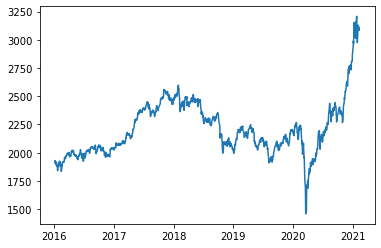

In [14]:
plt.plot(code['Close'])

In [15]:
data = code.filter(['Close']).values

In [16]:
data

array([[1918.76000977],
       [1930.5300293 ],
       [1925.43005371],
       ...,
       [3091.23999023],
       [3084.66992188],
       [3100.58007812]])

In [17]:
from sklearn.preprocessing import MinMaxScaler

In [18]:
scalar = MinMaxScaler(feature_range=(0,1))

In [19]:
# 정규화 방법을 Z-점수 정규화로 바꿔서 실행했을 때 결과 확인할 것(210311)

In [20]:
scaled_data = scalar.fit_transform(data)

In [21]:
scaled_data

array([[0.26329403],
       [0.27001457],
       [0.26710255],
       ...,
       [0.93276615],
       [0.92901472],
       [0.93809923]])

In [22]:
import math

In [23]:
training_data_len = math.ceil(len(scaled_data)*0.8)

In [24]:
training_data_len  # 1248 중 80%에 해당하는 999개의 데이터 갯수 출력

999

In [25]:
# set train data

In [26]:
train_data = scaled_data[0:training_data_len]

In [27]:
x_train = []

In [28]:
y_train = []

In [29]:
PAST_SET = 10

In [30]:
for i in range(PAST_SET, len(train_data)):
    x_train.append(train_data[i-PAST_SET:i, 0])
    y_train.append(train_data[i,0])

In [31]:
x_train    

[array([0.26329403, 0.27001457, 0.26710255, 0.25505464, 0.2626431 ,
        0.24963597, 0.24736345, 0.26187799, 0.252588  , 0.24051731]),
 array([0.27001457, 0.26710255, 0.25505464, 0.2626431 , 0.24963597,
        0.24736345, 0.26187799, 0.252588  , 0.24051731, 0.24027747]),
 array([0.26710255, 0.25505464, 0.2626431 , 0.24963597, 0.24736345,
        0.26187799, 0.252588  , 0.24051731, 0.24027747, 0.24666686]),
 array([0.25505464, 0.2626431 , 0.24963597, 0.24736345, 0.26187799,
        0.252588  , 0.24051731, 0.24027747, 0.24666686, 0.22143486]),
 array([0.2626431 , 0.24963597, 0.24736345, 0.26187799, 0.252588  ,
        0.24051731, 0.24027747, 0.24666686, 0.22143486, 0.21862564]),
 array([0.24963597, 0.24736345, 0.26187799, 0.252588  , 0.24051731,
        0.24027747, 0.24666686, 0.22143486, 0.21862564, 0.24083709]),
 array([0.24736345, 0.26187799, 0.252588  , 0.24051731, 0.24027747,
        0.24666686, 0.22143486, 0.21862564, 0.24083709, 0.24883093]),
 array([0.26187799, 0.252588  , 0.

In [32]:
y_train

[0.24027746731926036,
 0.24666686043460195,
 0.22143485992495038,
 0.21862564306733534,
 0.24083709420864585,
 0.2488309276486561,
 0.23641758216788544,
 0.25136608136901095,
 0.25654491279362557,
 0.25946843879292614,
 0.26675418286075214,
 0.2563507963548487,
 0.24725499490871272,
 0.2618665609446508,
 0.2627401894701903,
 0.230622108684435,
 0.21562795552733138,
 0.23099891064781997,
 0.24590175589296737,
 0.2434121864278943,
 0.2576298041291948,
 0.2618551300304822,
 0.2619236458147972,
 0.260701722910598,
 0.2597367864731023,
 0.26318550721789047,
 0.26409342848593564,
 0.2620949701259331,
 0.279658569745897,
 0.28579669185161916,
 0.2843463597661374,
 0.2856253675404833,
 0.2789162573319034,
 0.2828160809821719,
 0.2921688688950118,
 0.2933565687574017,
 0.2938476101617761,
 0.29253430964492455,
 0.2953493116603202,
 0.30282352641053467,
 0.3051817100633657,
 0.3038341865047046,
 0.30785968051013113,
 0.3068946743719393,
 0.30167011929065046,
 0.3004368351729786,
 0.2997116691302

In [33]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [34]:
x_train

array([[0.26329403, 0.27001457, 0.26710255, ..., 0.26187799, 0.252588  ,
        0.24051731],
       [0.27001457, 0.26710255, 0.25505464, ..., 0.252588  , 0.24051731,
        0.24027747],
       [0.26710255, 0.25505464, 0.2626431 , ..., 0.24051731, 0.24027747,
        0.24666686],
       ...,
       [0.46227767, 0.45021833, 0.4105861 , ..., 0.39984006, 0.40425379,
        0.43983209],
       [0.45021833, 0.4105861 , 0.41547379, ..., 0.40425379, 0.43983209,
        0.430702  ],
       [0.4105861 , 0.41547379, 0.39418734, ..., 0.43983209, 0.430702  ,
        0.42448972]])

In [35]:
y_train

array([0.24027747, 0.24666686, 0.22143486, 0.21862564, 0.24083709,
       0.24883093, 0.23641758, 0.25136608, 0.25654491, 0.25946844,
       0.26675418, 0.2563508 , 0.24725499, 0.26186656, 0.26274019,
       0.23062211, 0.21562796, 0.23099891, 0.24590176, 0.24341219,
       0.2576298 , 0.26185513, 0.26192365, 0.26070172, 0.25973679,
       0.26318551, 0.26409343, 0.26209497, 0.27965857, 0.28579669,
       0.28434636, 0.28562537, 0.27891626, 0.28281608, 0.29216887,
       0.29335657, 0.29384761, 0.29253431, 0.29534931, 0.30282353,
       0.30518171, 0.30383419, 0.30785968, 0.30689467, 0.30167012,
       0.30043684, 0.29971167, 0.30677479, 0.31090302, 0.30731148,
       0.29458985, 0.2976732 , 0.28840608, 0.29330513, 0.29477261,
       0.29372201, 0.29276272, 0.29901501, 0.31877697, 0.31808031,
       0.31487708, 0.31616752, 0.31300993, 0.32229992, 0.3185257 ,
       0.317989  , 0.3208896 , 0.31847433, 0.31021215, 0.30634083,
       0.29720502, 0.30192139, 0.29638276, 0.29130103, 0.29968

In [36]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [37]:
x_train

array([[[0.26329403],
        [0.27001457],
        [0.26710255],
        ...,
        [0.26187799],
        [0.252588  ],
        [0.24051731]],

       [[0.27001457],
        [0.26710255],
        [0.25505464],
        ...,
        [0.252588  ],
        [0.24051731],
        [0.24027747]],

       [[0.26710255],
        [0.25505464],
        [0.2626431 ],
        ...,
        [0.24051731],
        [0.24027747],
        [0.24666686]],

       ...,

       [[0.46227767],
        [0.45021833],
        [0.4105861 ],
        ...,
        [0.39984006],
        [0.40425379],
        [0.43983209]],

       [[0.45021833],
        [0.4105861 ],
        [0.41547379],
        ...,
        [0.40425379],
        [0.43983209],
        [0.430702  ]],

       [[0.4105861 ],
        [0.41547379],
        [0.39418734],
        ...,
        [0.43983209],
        [0.430702  ],
        [0.42448972]]])

In [38]:
from tensorflow.keras.models import Sequential

In [39]:
from tensorflow.keras.layers import Dense, LSTM

In [40]:
from tensorflow import keras

In [41]:
model = Sequential()

In [42]:
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))

In [43]:
model.add(LSTM(50, return_sequences=False))

In [44]:
model.add(Dense(25))

In [45]:
model.add(Dense(1))

In [46]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [47]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 10, 50)            10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 25)                1275      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 26        
Total params: 31,901
Trainable params: 31,901
Non-trainable params: 0
_________________________________________________________________


In [48]:
model.fit(x_train, y_train, batch_size=5, epochs=100)

Epoch 1/100
198/198 [==============================] - 1s 1ms/step - loss: 0.0148
Epoch 2/100
198/198 [==============================] - 0s 1ms/step - loss: 4.4389e-04
Epoch 3/100
198/198 [==============================] - 0s 1ms/step - loss: 4.2068e-04
Epoch 4/100
198/198 [==============================] - 0s 1ms/step - loss: 4.8632e-04
Epoch 5/100
198/198 [==============================] - 0s 1ms/step - loss: 4.5087e-04
Epoch 6/100
198/198 [==============================] - 0s 1ms/step - loss: 4.8628e-04
Epoch 7/100
198/198 [==============================] - 0s 1ms/step - loss: 5.1346e-04
Epoch 8/100
198/198 [==============================] - 0s 1ms/step - loss: 3.8903e-04
Epoch 9/100
198/198 [==============================] - 0s 1ms/step - loss: 3.8267e-04
Epoch 10/100
198/198 [==============================] - 0s 1ms/step - loss: 3.9585e-04
Epoch 11/100
198/198 [==============================] - 0s 1ms/step - loss: 3.6994e-04
Epoch 12/100
198/198 [==============================] - 

198/198 [==============================] - 0s 1ms/step - loss: 1.2479e-04
Epoch 96/100
198/198 [==============================] - 0s 1ms/step - loss: 2.6061e-04
Epoch 97/100
198/198 [==============================] - 0s 1ms/step - loss: 2.3686e-04
Epoch 98/100
198/198 [==============================] - 0s 1ms/step - loss: 1.6323e-04
Epoch 99/100
198/198 [==============================] - 0s 1ms/step - loss: 2.4321e-04
Epoch 100/100
198/198 [==============================] - 0s 1ms/step - loss: 2.0317e-04


In [49]:
# Training 시간 소요 : MAC이 서피스 보다 빠름 (210311)

In [50]:
test_data = scaled_data[training_data_len - PAST_SET:,:]

In [51]:
x_test = []

In [52]:
y_test = data[training_data_len:,:]

In [53]:
for i in range(PAST_SET, len(test_data)):
    x_test.append(test_data[i-PAST_SET:i, 0])

In [54]:
x_test = np.array(x_test)

In [55]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [56]:
predictions = model.predict(x_test)

In [57]:
predictions

array([[0.4230518 ],
       [0.42900681],
       [0.42638898],
       [0.43466297],
       [0.4323775 ],
       [0.41571704],
       [0.42067853],
       [0.4093031 ],
       [0.3937837 ],
       [0.35110998],
       [0.36988539],
       [0.34511667],
       [0.3381259 ],
       [0.3011973 ],
       [0.3128754 ],
       [0.31050006],
       [0.33328852],
       [0.34179854],
       [0.31943893],
       [0.28266746],
       [0.2905294 ],
       [0.25604123],
       [0.22460666],
       [0.19419426],
       [0.16535191],
       [0.14234813],
       [0.10238266],
       [0.044796  ],
       [0.08197081],
       [0.03408842],
       [0.13573965],
       [0.09530487],
       [0.11588332],
       [0.13735756],
       [0.13666512],
       [0.15795225],
       [0.12681314],
       [0.15186876],
       [0.14629123],
       [0.18043096],
       [0.19155405],
       [0.18802148],
       [0.20590228],
       [0.21598268],
       [0.20135364],
       [0.22097993],
       [0.21728674],
       [0.248

In [58]:
predictions = scalar.inverse_transform(predictions)

In [59]:
predictions

array([[2198.5518],
       [2208.981 ],
       [2204.3962],
       [2218.887 ],
       [2214.8843],
       [2185.706 ],
       [2194.3955],
       [2174.4731],
       [2147.293 ],
       [2072.5564],
       [2105.4387],
       [2062.06  ],
       [2049.817 ],
       [1985.1418],
       [2005.5942],
       [2001.4343],
       [2041.3448],
       [2056.2488],
       [2017.0894],
       [1952.6897],
       [1966.4587],
       [1906.0579],
       [1851.005 ],
       [1797.7422],
       [1747.2291],
       [1706.9414],
       [1636.9479],
       [1536.0935],
       [1601.1996],
       [1517.3408],
       [1695.3677],
       [1624.5521],
       [1660.5923],
       [1698.2012],
       [1696.9885],
       [1734.2697],
       [1679.7341],
       [1723.6154],
       [1713.8472],
       [1773.6378],
       [1793.1182],
       [1786.9314],
       [1818.247 ],
       [1835.9012],
       [1810.2806],
       [1844.6531],
       [1838.1852],
       [1892.8011],
       [1872.0115],
       [1867.8213],


In [60]:
len(predictions)

249

In [61]:
rmse = np.sqrt(np.mean(predictions - y_test)**2)

In [62]:
rmse

33.172703999592116

In [63]:
data = code.filter(['Close'])

In [64]:
data

,Close
Date,
2016-01-04,1918.760010
2016-01-05,1930.530029
2016-01-06,1925.430054
2016-01-07,1904.329956
2016-01-08,1917.619995
...,...
2021-02-04,3087.550049
2021-02-05,3120.629883
2021-02-08,3091.239990


In [65]:
train = data[:training_data_len]

In [66]:
train

,Close
Date,
2016-01-04,1918.760010
2016-01-05,1930.530029
2016-01-06,1925.430054
2016-01-07,1904.329956
2016-01-08,1917.619995
...,...
2020-02-05,2165.629883
2020-02-06,2227.939941
2020-02-07,2211.949951


In [67]:
valid = data[training_data_len:]

In [68]:
valid

,Close
Date,
2020-02-12,2238.379883
2020-02-13,2232.959961
2020-02-14,2243.590088
2020-02-17,2242.169922
2020-02-18,2208.879883
...,...
2021-02-04,3087.550049
2021-02-05,3120.629883
2021-02-08,3091.239990


In [69]:
predictions

array([[2198.5518],
       [2208.981 ],
       [2204.3962],
       [2218.887 ],
       [2214.8843],
       [2185.706 ],
       [2194.3955],
       [2174.4731],
       [2147.293 ],
       [2072.5564],
       [2105.4387],
       [2062.06  ],
       [2049.817 ],
       [1985.1418],
       [2005.5942],
       [2001.4343],
       [2041.3448],
       [2056.2488],
       [2017.0894],
       [1952.6897],
       [1966.4587],
       [1906.0579],
       [1851.005 ],
       [1797.7422],
       [1747.2291],
       [1706.9414],
       [1636.9479],
       [1536.0935],
       [1601.1996],
       [1517.3408],
       [1695.3677],
       [1624.5521],
       [1660.5923],
       [1698.2012],
       [1696.9885],
       [1734.2697],
       [1679.7341],
       [1723.6154],
       [1713.8472],
       [1773.6378],
       [1793.1182],
       [1786.9314],
       [1818.247 ],
       [1835.9012],
       [1810.2806],
       [1844.6531],
       [1838.1852],
       [1892.8011],
       [1872.0115],
       [1867.8213],


In [71]:
valid.loc[:,'Predictions'] = predictions

In [72]:
valid

,Close,Predictions
Date,,
2020-02-12,2238.379883,2198.551758
2020-02-13,2232.959961,2208.980957
2020-02-14,2243.590088,2204.396240
2020-02-17,2242.169922,2218.886963
2020-02-18,2208.879883,2214.884277
...,...,...
2021-02-04,3087.550049,3069.871582
2021-02-05,3120.629883,3002.410400
2021-02-08,3091.239990,3074.141602


In [74]:
plt.figure(figsize = (8,4))

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

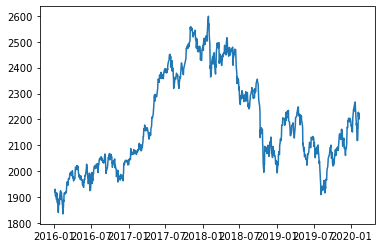

In [75]:
plt.plot(train['Close'])

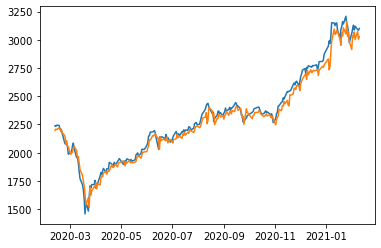

In [76]:
plt.plot(valid[['Close', 'Predictions']])

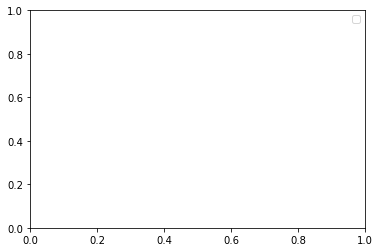

In [77]:
plt.legend(['Train', 'Val', 'Predictions'])

In [78]:
plt.show()